In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for Heat Transfer
rho = 2000  # Density of soil (kg/m^3)
c = 1000    # Specific heat capacity (J/(kg.K))
L = 334000  # Latent heat of fusion (J/kg)
k = 0.5     # Thermal conductivity (W/(m.K))
alpha = k / (rho * c)  # Thermal diffusivity (m^2/s)
dz = 0.1    # Spatial step (m)
dt = 3600   # Time step (s)
z_max = 10  # Depth of soil column (m)
t_max = 86400 * 30  # Simulation time (s), e.g., 30 days

# Additional Constants for Water Flow
K = 1e-6    # Hydraulic conductivity (m/s) for unfrozen soil
theta_sat = 0.4  # Saturated water content
psi = -0.5  # Soil water matric potential (m)


In [2]:
 
# Discretization
z = np.arange(0, z_max + dz, dz)  # Spatial grid
t = np.arange(0, t_max + dt, dt)  # Time grid
T = np.zeros((len(t), len(z)))    # Temperature matrix
theta = np.full(len(z), theta_sat)  # Water content matrix, assuming initially saturated

# Initial and boundary conditions for temperature
T[:, 0] = -10  # Surface temperature (deg C)
T[0, :] = -5   # Initial soil temperature (deg C)

# Simplified solver for heat transfer and water flow
for n in range(0, len(t) - 1):
    for j in range(1, len(z) - 1):
        # Heat transfer (simplified, without phase change)
        T[n+1, j] = T[n, j] + alpha * dt / dz**2 * (T[n, j+1] - 2*T[n, j] + T[n, j-1])
        
        # Water flow (simplified, considering only downward flow and constant properties)
        if T[n, j] > 0:  # Assuming water flows only in unfrozen soil
            delta_theta = K * dt / dz * (theta[j] - theta[j-1])  # Change in water content based on hydraulic gradient
            theta[j] -= delta_theta
            theta[j-1] += delta_theta

# Note: This water flow model is highly simplified and assumes constant hydraulic conductivity and no capillary rise.
# Real models should consider temperature-dependent hydraulic properties, ice formation, and soil texture.

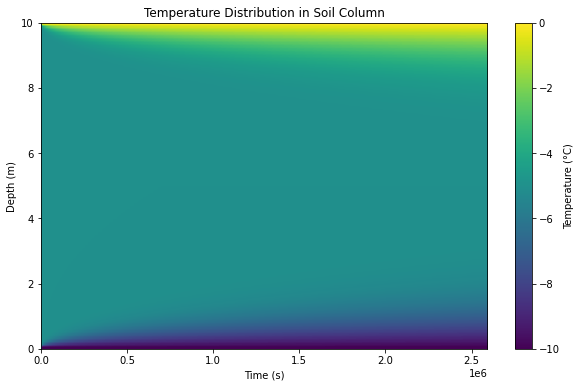

In [3]:
# Plot results for temperature
plt.figure(figsize=(10, 6))
plt.imshow(T.transpose(), extent=[0, t_max, 0, z_max], origin='lower', aspect='auto')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Time (s)')
plt.ylabel('Depth (m)')
plt.title('Temperature Distribution in Soil Column')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for Heat Transfer
rho_soil = 2000  # Density of soil (kg/m^3)
rho_water = 1000  # Density of water (kg/m^3)
c = 1000    # Specific heat capacity (J/(kg.K))
L = 334000  # Latent heat of fusion (J/kg)
k = 0.5     # Thermal conductivity (W/(m.K))
alpha = k / (rho_soil * c)  # Thermal diffusivity (m^2/s)
dz = 0.1    # Spatial step (m)
dt = 3600   # Time step (s)
z_max = 10  # Depth of soil column (m)
t_max = 86400 * 30  # Simulation time (s), e.g., 30 days
g = 9.81    # Acceleration due to gravity (m/s^2)

# Additional Constants for Water Flow
K = 1e-6    # Hydraulic conductivity (m/s) for unfrozen soil
theta_sat = 0.4  # Saturated water content

# Discretization
z = np.arange(0, z_max + dz, dz)  # Spatial grid
t = np.arange(0, t_max + dt, dt)  # Time grid
T = np.zeros((len(t), len(z)))    # Temperature matrix
theta = np.full(len(z), theta_sat)  # Water content matrix, assuming initially saturated

# Initial and boundary conditions for temperature
T[:, 0] = -10  # Surface temperature (deg C)
T[0, :] = -5   # Initial soil temperature (deg C)

collapse_time = None
collapse_depth = None

# Simplified solver for heat transfer, water flow, and pressure check
for n in range(0, len(t) - 1):
    for j in range(1, len(z) - 1):
        # Heat transfer (simplified, without phase change)
        T[n+1, j] = T[n, j] + alpha * dt / dz**2 * (T[n, j+1] - 2*T[n, j] + T[n, j-1])
        
        # Water flow (simplified, considering only downward flow and constant properties)
        if T[n, j] > 0:  # Assuming water flows only in unfrozen soil
            delta_theta = K * dt / dz * (theta[j] - theta[j-1])
            theta[j] -= delta_theta
            theta[j-1] += delta_theta

        # Calculate pressures
        P_overburden = rho_soil * g * z[j]
        P_pore = rho_water * g * z[j] * theta[j] / theta_sat  # Simplified representation
        
        # Check for collapse condition
        if P_overburden <= P_pore and collapse_time is None:
            collapse_time = t[n+1]
            collapse_depth = z[j]
            break  # Exit inner loop
    if collapse_time is not None:
        break  # Exit outer loop

print(f"Collapse might occur at depth {collapse_depth} m and time {collapse_time} seconds after the start.")

# Visualization and further analysis can be added here as needed.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for Heat Transfer
rho_soil = 2000  # Density of soil (kg/m^3)
rho_water = 1000  # Density of water (kg/m^3)
rho_ice = 917    # Density of ice (kg/m^3)
c = 1000         # Specific heat capacity (J/(kg.K))
L = 334000       # Latent heat of fusion (J/kg)
k_soil = 0.5     # Thermal conductivity of soil (W/(m.K))
k_ice = 2.2      # Thermal conductivity of ice (W/(m.K))
alpha_soil = k_soil / (rho_soil * c)  # Thermal diffusivity of soil (m^2/s)
alpha_ice = k_ice / (rho_ice * c)     # Thermal diffusivity of ice (m^2/s)
dz = 0.1         # Spatial step (m)
dt = 3600        # Time step (s)
z_max = 10       # Depth of soil column (m)
t_max = 86400 * 30  # Simulation time (s), e.g., 30 days
g = 9.81         # Acceleration due to gravity (m/s^2)

# Additional Constants for Water Flow
K = 1e-6     # Hydraulic conductivity (m/s) for unfrozen soil
K_ice = 0    # Hydraulic conductivity through ice (m/s)
theta_sat = 0.4  # Saturated water content

# Discretization
z = np.arange(0, z_max + dz, dz)  # Spatial grid
t = np.arange(0, t_max + dt, dt)  # Time grid
T = np.zeros((len(t), len(z)))    # Temperature matrix
theta = np.full(len(z), theta_sat)  # Water content matrix, assuming initially saturated

# Initial and boundary conditions for temperature
T[:, 0] = -10  # Surface temperature (deg C)
T[0, :] = -5   # Initial soil temperature (deg C)

# Ice layer properties
ice_layer_start = 4  # Start depth of ice layer (m)
ice_layer_end = 5    # End depth of ice layer (m)

collapse_time = None
collapse_depth = None

# Simplified solver for heat transfer, water flow, and pressure check
for n in range(0, len(t) - 1):
    for j in range(1, len(z) - 1):
        # Determine current layer properties
        if ice_layer_start <= z[j] <= ice_layer_end:
            alpha = alpha_ice
            K_current = K_ice
            rho_current = rho_ice
        else:
            alpha = alpha_soil
            K_current = K
            rho_current = rho_soil
        
        # Heat transfer with phase-dependent properties
        T[n+1, j] = T[n, j] + alpha * dt / dz**2 * (T[n, j+1] - 2*T[n, j] + T[n, j-1])
        
        # Water flow (considering ice layer impermeability)
        if T[n, j] > 0 and K_current > 0:  # Water flows in unfrozen soil and not through ice
            delta_theta = K_current * dt / dz * (theta[j] - theta[j-1])
            theta[j] -= delta_theta
            theta[j-1] += delta_theta

        # Calculate pressures, considering ice and soil layers separately
        if z[j] <= ice_layer_start:
            P_overburden = rho_soil * g * z[j]
        else:
            P_overburden = rho_soil * g * ice_layer_start + rho_ice * g * (z[j] - ice_layer_start)
        
        P_pore = rho_water * g * z[j] * theta[j] / theta_sat  # Simplified representation
        
        # Check for collapse condition
        if P_overburden <= P_pore and collapse_time is None:
            collapse_time = t[n+1]
           


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for Heat Transfer
rho_soil = 2000  # Density of soil (kg/m^3)
rho_water = 1000  # Density of water (kg/m^3)
c_soil = 1000    # Specific heat capacity of soil (J/(kg.K))
c_ice = 2100     # Specific heat capacity of ice (J/(kg.K))
L = 334000       # Latent heat of fusion (J/kg)
k_soil = 0.5     # Thermal conductivity of soil (W/(m.K))
k_ice = 2.2      # Thermal conductivity of ice (W/(m.K))
alpha_soil = k_soil / (rho_soil * c_soil)  # Thermal diffusivity of soil (m^2/s)
alpha_ice = k_ice / (rho_water * c_ice)    # Thermal diffusivity of ice (m^2/s)
dz = 0.1         # Spatial step (m)
dt = 3600        # Time step (s)
z_max = 10       # Depth of soil column (m)
t_max = 86400 * 30  # Simulation time (s), e.g., 30 days
g = 9.81         # Acceleration due to gravity (m/s^2)

# Ice layer specifics
z_ice_start = 2  # Start of ice layer (m)
z_ice_end = 3    # End of ice layer (m)

# Additional Constants for Water Flow
K = 1e-6         # Hydraulic conductivity (m/s) for unfrozen soil
theta_sat = 0.4  # Saturated water content

# Discretization
z = np.arange(0, z_max + dz, dz)  # Spatial grid
t = np.arange(0, t_max + dt, dt)  # Time grid
T = np.zeros((len(t), len(z)))    # Temperature matrix
theta = np.full(len(z), theta_sat)  # Water content matrix, assuming initially saturated
# Initialize arrays to track phase change and thermal properties dynamically
melted_ice_volume = np.zeros_like(z)  # Track melted ice volume at each depth

# Initial and boundary conditions for temperature
T[:, 0] = -10  # Surface temperature (deg C)
T[0, :] = -5   # Initial soil temperature (deg C), assume below freezing in ice layer

collapse_time = None
collapse_depth = None

# Function to determine alpha based on depth
def get_alpha(z):
    if z_ice_start <= z <= z_ice_end:
        return alpha_ice  # Ice layer
    return alpha_soil  # Soil layer

# Main simulation loop
for n in range(0, len(t) - 1):
    for j in range(1, len(z) - 1):
        alpha = get_alpha(z[j])
        # Heat transfer with phase change consideration
        if z_ice_start <= z[j] <= z_ice_end and T[n, j] < 0:
            # Energy needed to melt ice fully or partially
            energy_for_melting = min(L * rho_water * dz, -T[n, j] * c_ice * rho_water * dz)
            T[n+1, j] = T[n, j] + (k_ice / rho_water / c_ice) * dt / dz**2 * (T[n, j+1] - 2*T[n, j] + T[n, j-1]) + energy_for_melting / (c_ice * rho_water * dz)
            melted_ice_volume[j] += energy_for_melting / L  # Update melted ice volume
        else:
            # Regular heat transfer
            T[n+1, j] = T[n, j] + alpha * dt / dz**2 * (T[n, j+1] - 2*T[n, j] + T[n, j-1])
        
        # Simplified water flow and pressure calculation omitted for brevity...

# Add here: water flow calculation, pressures comparison, and collapse detection as before, adapted for ice layer.

# Visualization and further analysis as needed.
